#Stream the twitter data based on hashtag



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#DATA COLLECTION from twitter API


In [ ]:
import tweepy as tw
import pandas as pd

#Import the necessary methods from tweepy library
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

# Enter Twitter API Keys
access_token = "1619548242-ZZmILNc13RjDuD91rf29aZW8wVvHVK2YhqMQVDE"
access_token_secret = "94jPNbyJHdnhVJjSmpR4p1BS5r9j8cCyCkTtrJBxElO5j"
consumer_key = "SR5vXK61dIQfKIM9RzY1k0iGB"
consumer_secret = "q2syNZgXNNgDoIIllPeoZ3Jja3Y0zENJdtvwVrJ7hfkCDjgoSp"

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

print(api)

In [ ]:
search_words = "#jokowi"
date_since = "2020-03-09"

In [ ]:
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="id",
              since=date_since).items(10000)
tweets = [tweet.text for tweet in tweets]

df=pd.DataFrame(tweets, columns=['Text']) 
df.count

<bound method DataFrame.count of                                                    Text
0     RT @detikcom: Presiden Jokowi mengawali pekan ...
1     RT @golkar_id: Penyampaian aspirasi memang dil...
2     RAIH KEBERKAHAN DENGAN SEDEKAH\n\nTransfer Sed...
3     @AXA_Mandiri kembalikan uangq yang kau rampas....
4     RT @detikcom: Presiden Jokowi angkat bicara so...
...                                                 ...
9995  RT @dwiputri_mshrrh: KETOK PALU BU #PuanMahara...
9996  RT @ymsso_: sugeng enjing semuanya\nYo piye ka...
9997  RT @s_rhaa: #Jokowi\n#kpopers #DPRPengkhianatR...
9998  RT @dwiputri_mshrrh: KETOK PALU BU #PuanMahara...
9999  RT @s_rhaa: #Jokowi\n#kpopers #DPRPengkhianatR...

[10000 rows x 1 columns]>

#DATA COLLECTION Read data from vicinitas (excel)


In [ ]:
import pandas as pd
import re

path = '/content/drive/My Drive/BrosnanChapter/vicinitas_search_results_dirumahaja.xlsx'

#DATA PREPROCESSING

In [ ]:
#mengurangi data yang duplikat
df.drop_duplicates(subset='Text',keep=False, inplace=True)

In [ ]:
for index, row in df.iterrows():
  tweet = row['Text']
  # clean_tweets = tweet.replace('\n','').strip()
  # clean_tweets = re.sub(r"http\S+", "", clean_tweets)
  # clean_tweets = clean_tweets.replace(u'\u2018',"'").replace(u'\u2019',"'")
  # clean_tweets = re.sub(r'[^\x00-\x7F]+','', clean_tweets)
  # clean_tweets = clean_tweets.replace('RT','')
  # clean_tweets = re.sub(r"[,.;:/@#?!&$]+\ *", " ", clean_tweets)

  clean_tweets = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|\d+"," ",tweet).split())
  clean_tweets = clean_tweets.replace('RT','')
  # clean_tweets = clean_tweets.lower()


##Stemming library

In [ ]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

#create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

##Menghitung Sentiment (Bahasa Indonesia diubah Bahasa Inggris)

##Hasil Preprocessing

In [ ]:
import re,string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

#create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def strip_links(text):
    link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')    
    return text

def strip_all_entities(text):
    entity_prefixes = ['@','#']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)

tweets_list = []
tokenized_tweets = []
tweet_sentiment = []

# Tolong bikin jadi fungsi
for index, row in df.iterrows():
  tweet = row['Text']
  each_tweet = strip_all_entities(strip_links(tweet))
  each_tweet = each_tweet.replace('RT','')
  each_tweet = each_tweet.lower()
  
  # stemming
  each_tweet = stemmer.stem(each_tweet)

  

  # bikin list of tweets
  tweets_list.append(each_tweet)
  
  # bikin tokenisasi tweet
  tokenized_tweets.append(each_tweet.split())


df['tweets_list'] = tweets_list
df['token_tweet'] = tokenized_tweets
# df['sentiment'] = tweet_sentiment

In [ ]:
df.head()

,Text,tweets_list,token_tweet
2,RAIH KEBERKAHAN DENGAN SEDEKAH\n\nTransfer Sed...,raih berkah dengan sedekah transfer sedekah la...,"[raih, berkah, dengan, sedekah, transfer, sede..."
3,@AXA_Mandiri kembalikan uangq yang kau rampas....,mandiri kembali uangq yang kau rampas susah pa...,"[mandiri, kembali, uangq, yang, kau, rampas, s..."
11,"Sudah Sepekan, DPR Belum Kirim Draf UU Ciptake...",sudah pek dpr belum kirim draf uu ciptaker ke ...,"[sudah, pek, dpr, belum, kirim, draf, uu, cipt..."
12,RT @gergalelana: Retweet ya\nhttps://t.co/7XWE...,retweet ya,"[retweet, ya]"
14,"Lapor Pak Jokowi, 17 Persen Masyarakat Indones...",lapor pak jokowi 17 persen masyarakat indonesi...,"[lapor, pak, jokowi, 17, persen, masyarakat, i..."


In [ ]:
tokenized_tweets

[['raih',
  'berkah',
  'dengan',
  'sedekah',
  'transfer',
  'sedekah',
  'lalu',
  'rekening',
  'bank',
  'bca',
  '051',
  '309',
  '9999',
  'website',
  'baznas',
  'kalsel',
  's'],
 ['mandiri',
  'kembali',
  'uangq',
  'yang',
  'kau',
  'rampas',
  'susah',
  'payah',
  'kami',
  'kumpul',
  'sedikit',
  'demi',
  'sedikit',
  'dengan',
  'seenakny'],
 ['sudah',
  'pek',
  'dpr',
  'belum',
  'kirim',
  'draf',
  'uu',
  'ciptaker',
  'ke',
  'presiden',
  'jokowi'],
 ['retweet', 'ya'],
 ['lapor',
  'pak',
  'jokowi',
  '17',
  'persen',
  'masyarakat',
  'indonesia',
  'masih',
  'tak',
  'percaya',
  'covid',
  '19'],
 ['perintah',
  'prioritas',
  'profesi',
  'ini',
  'dapat',
  'sunti',
  'vaksin',
  'covid',
  '19',
  'di',
  'tahap',
  'awal',
  'siapa',
  'saja'],
 ['presiden',
  'joko',
  'widodo',
  'instruksi',
  'jajar',
  'untuk',
  'terus',
  'upaya',
  'baik',
  'dan',
  'tingkat',
  'tangan',
  'pand'],
 ['sampai',
  'aspirasi',
  'memang',
  'lindung',
  'ko

##Membuat kata tidak baku menjadi baku

In [ ]:
normstem_wrd = pd.read_csv('/content/drive/My Drive/BrosnanChapter/stopword-bahasa_indonesia.csv')

normstem_wrd.tail()

,wordstop_word
753,wong
754,yaitu
755,yakin
756,yakni
757,yang


In [ ]:
#import dataset stopwords pada library nltk
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

listStopword =  set(stopwords.words('indonesian'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
tokenized_tweets_baru = []

for split_tweets in tokenized_tweets:
  for tweet in split_tweets:
    if tweet in listStopword:
      split_tweets.remove(tweet)
  tokenized_tweets_baru.append(split_tweets)


tokenized_tweets = tokenized_tweets_baru
tokenized_tweets

[['raih',
  'berkah',
  'sedekah',
  'transfer',
  'sedekah',
  'rekening',
  'bank',
  'bca',
  '051',
  '309',
  '9999',
  'website',
  'baznas',
  'kalsel',
  's'],
 ['mandiri',
  'uangq',
  'kau',
  'rampas',
  'susah',
  'payah',
  'kumpul',
  'demi',
  'dengan',
  'seenakny'],
 ['pek', 'dpr', 'kirim', 'draf', 'uu', 'ciptaker', 'presiden', 'jokowi'],
 ['retweet', 'ya'],
 ['lapor',
  'jokowi',
  '17',
  'persen',
  'masyarakat',
  'indonesia',
  'tak',
  'percaya',
  'covid',
  '19'],
 ['perintah',
  'prioritas',
  'profesi',
  'dapat',
  'sunti',
  'vaksin',
  'covid',
  '19',
  'tahap',
  'siapa'],
 ['presiden',
  'joko',
  'widodo',
  'instruksi',
  'jajar',
  'terus',
  'upaya',
  'dan',
  'tingkat',
  'tangan',
  'pand'],
 ['aspirasi',
  'lindung',
  'konstitusi',
  'arah',
  'presiden',
  'demonstrasi',
  'jadi',
  'kl'],
 ['salah', 'sepeda', 'indonesia', 'pakai', 'jokowi', 'via'],
 ['covid', '19', 'sudah', 'dapat', 'langsung', 'distribusi', 'masyarakat'],
 ['rapat',
  'batas

In [ ]:
from textblob import TextBlob

In [ ]:
tweet_sentiment = []
list_of_tweet = []
tweet_polarity = []
df.count()

for index, row in df.iterrows():
  tweet = row['tweets_list']

  list_of_tweet.append(tweet)
  blob = TextBlob(tweet)
  
  try:
    analyticTranslate = blob.translate(from_lang='id', to='en')
  except:
    analyticTranslate = ''

  if (blob.polarity > 0):
    sentiment = 'positive'
  elif (blob.polarity < 0):
    sentiment = 'negative'
  else:
    sentiment = 'netral'
  
  tweet_sentiment.append(sentiment)

df['sentiment'] = tweet_sentiment


In [ ]:
df

,Text,tweets_list,token_tweet,sentiment
2,RAIH KEBERKAHAN DENGAN SEDEKAH\n\nTransfer Sed...,raih berkah dengan sedekah transfer sedekah la...,"[raih, berkah, sedekah, transfer, sedekah, rek...",netral
3,@AXA_Mandiri kembalikan uangq yang kau rampas....,mandiri kembali uangq yang kau rampas susah pa...,"[mandiri, uangq, kau, rampas, susah, payah, ku...",netral
11,"Sudah Sepekan, DPR Belum Kirim Draf UU Ciptake...",sudah pek dpr belum kirim draf uu ciptaker ke ...,"[pek, dpr, kirim, draf, uu, ciptaker, presiden...",netral
12,RT @gergalelana: Retweet ya\nhttps://t.co/7XWE...,retweet ya,"[retweet, ya]",netral
14,"Lapor Pak Jokowi, 17 Persen Masyarakat Indones...",lapor pak jokowi 17 persen masyarakat indonesi...,"[lapor, jokowi, 17, persen, masyarakat, indone...",netral
...,...,...,...,...
9911,Tolong kami rakyatmu wahai pak presiden. Negar...,tolong kami rakyat wahai pak presiden negara s...,"[tolong, rakyat, pak, presiden, negara, hancur...",netral
9922,sugeng enjing semuanya\nYo piye kabar e..\nLag...,sugeng enjing semua yo piye kabar e lagi susah...,"[sugeng, enjing, yo, piye, kabar, e, susah, iki]",netral
9933,Siapkan baju lengan panjang kacamata dan maske...,siap baju lengan panjang kacamata dan masker g...,"[baju, lengan, kacamata, masker, gas, air, mat...",netral
9963,Semangat buat hari ini🇮🇩💪🔥\nJagn lupa tetap pa...,semangat buat hari ini jagn lupa tetap patuh p...,"[semangat, hari, jagn, lupa, patuh, protokol, ...",netral


In [ ]:
list_of_words = []

listStopword =  set(stopwords.words('indonesian'))

clean_token = []

for index, row in df.iterrows():
  tweet = row['token_tweet']
  for t in tweet:
    if t not in listStopword:
      list_of_words.append(t)

print(list_of_words)

['raih', 'berkah', 'sedekah', 'transfer', 'sedekah', 'rekening', 'bank', 'bca', '051', '309', '9999', 'website', 'baznas', 'kalsel', 's', 'mandiri', 'uangq', 'kau', 'rampas', 'susah', 'payah', 'kumpul', 'seenakny', 'pek', 'dpr', 'kirim', 'draf', 'uu', 'ciptaker', 'presiden', 'jokowi', 'retweet', 'ya', 'lapor', 'jokowi', '17', 'persen', 'masyarakat', 'indonesia', 'percaya', 'covid', '19', 'perintah', 'prioritas', 'profesi', 'sunti', 'vaksin', 'covid', '19', 'tahap', 'presiden', 'joko', 'widodo', 'instruksi', 'jajar', 'upaya', 'tingkat', 'tangan', 'pand', 'aspirasi', 'lindung', 'konstitusi', 'arah', 'presiden', 'demonstrasi', 'kl', 'salah', 'sepeda', 'indonesia', 'pakai', 'jokowi', 'via', 'covid', '19', 'langsung', 'distribusi', 'masyarakat', 'rapat', 'batas', 'presiden', 'joko', 'widodo', 'prioritas', 'tangan', 'corona', '12', 'kabupaten', 'kota', 'corona', 'harap', 'tu', 'duit', 'yg', 'uber', 'omnibus', 'law', 'ngga', 'yg', 'maksud', 'inflow', 'dlm', 'pikir', 'khusus', 'yg', 'nge', 'ra

### Menghitung 10 kata paling sering muncul

In [ ]:
from collections import Counter

word_counter = Counter(list_of_words)
most_common_words = word_counter.most_common(10)
most_common_words

[('jokowi', 262),
 ('kerja', 188),
 ('presiden', 185),
 ('uu', 155),
 ('cipta', 153),
 ('rakyat', 150),
 ('yg', 118),
 ('dpr', 107),
 ('demo', 88),
 ('indonesia', 76)]

In [ ]:
sorted_word_counts = sorted(word_counter.values(),reverse=True)
#sorted_word_counts = sorted(list(word_counter.values()), reverse=True)
sorted_word_counts[:10]

[262, 188, 185, 155, 153, 150, 118, 107, 88, 76]

Text(0.5, 1.0, 'Word Rank for GOP Twitters')

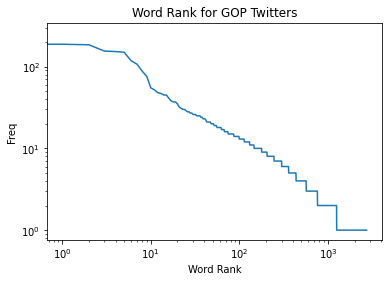

In [ ]:
import matplotlib.pyplot as plt

plt.loglog(sorted_word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")
plt.title('Word Rank for GOP Twitters')

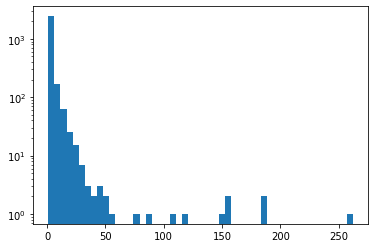

In [ ]:
plt.hist(sorted_word_counts, bins=50, log=True);

In [ ]:
label_count=pd.Series(tweet_sentiment).value_counts()
label_count

netral      1091
negative      46
positive      40
dtype: int64

In [ ]:
review_ratio = [opinion/sum(label_count)*100 for opinion in label_count]
print('Sentiment Ratio: ', review_ratio)
Pos_ratio = label_count['positive']/sum(label_count)*100
print('Positive comments ratio: {0}%'.format(Pos_ratio))

Sentiment Ratio:  [92.69328802039082, 3.908241291418862, 3.3984706881903146]
Positive comments ratio: 3.3984706881903146%


Text(0.5, 1.0, 'Sentiment Ratio for GOP Twitters')

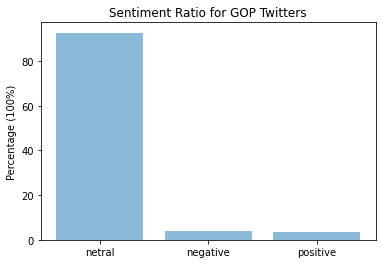

In [ ]:
y_pos = range(len(label_count))
#plt.bar(y_pos,label_count,align='center', alpha=.5)
plt.bar(y_pos,review_ratio,align='center', alpha=.5)
plt.xticks(y_pos,label_count.index)
plt.ylabel('Percentage (100%)')
plt.title('Sentiment Ratio for GOP Twitters')

In [ ]:
labels = df['sentiment']
text_label_pair_list = list(zip(tokenized_tweets_baru,labels))
text_label_pair_list

[(['raih',
   'berkah',
   'sedekah',
   'transfer',
   'sedekah',
   'rekening',
   'bank',
   'bca',
   '051',
   '309',
   '9999',
   'website',
   'baznas',
   'kalsel',
   's'],
  'netral'),
 (['mandiri',
   'uangq',
   'kau',
   'rampas',
   'susah',
   'payah',
   'kumpul',
   'demi',
   'dengan',
   'seenakny'],
  'netral'),
 (['pek', 'dpr', 'kirim', 'draf', 'uu', 'ciptaker', 'presiden', 'jokowi'],
  'netral'),
 (['retweet', 'ya'], 'netral'),
 (['lapor',
   'jokowi',
   '17',
   'persen',
   'masyarakat',
   'indonesia',
   'tak',
   'percaya',
   'covid',
   '19'],
  'netral'),
 (['perintah',
   'prioritas',
   'profesi',
   'dapat',
   'sunti',
   'vaksin',
   'covid',
   '19',
   'tahap',
   'siapa'],
  'netral'),
 (['presiden',
   'joko',
   'widodo',
   'instruksi',
   'jajar',
   'terus',
   'upaya',
   'dan',
   'tingkat',
   'tangan',
   'pand'],
  'netral'),
 (['aspirasi',
   'lindung',
   'konstitusi',
   'arah',
   'presiden',
   'demonstrasi',
   'jadi',
   'kl'],
 

In [ ]:
#remove those neutral tweets as I am only interested in neg / pos ones
text_label_pair_list[:] = [tuple for tuple in text_label_pair_list if tuple[1]!='netral']

In [ ]:
from nltk.classify import NaiveBayesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob 
from wordcloud import WordCloud, STOPWORDS

In [ ]:
#split into train and test set, 90% for training set, 10% reserved for testing and evaluation
train, test = train_test_split(text_label_pair_list, test_size = .1, random_state=7)

In [ ]:
train_pos = [tuple for tuple in text_label_pair_list if tuple[1]=='positive']
train_neg = [tuple for tuple in text_label_pair_list if tuple[1]=='negative']

In [ ]:
#unzip texts
train_pos_texts, _ = list(zip(*train_pos))
train_neg_texts, _ = list(zip(*train_neg))

In [ ]:
train_pos_texts_str = ' '.join([word for sublist in train_pos_texts
                                        for word in sublist])
train_neg_texts_str = ' '.join([word for sublist in train_neg_texts
                                        for word in sublist])


Positive comments in training set


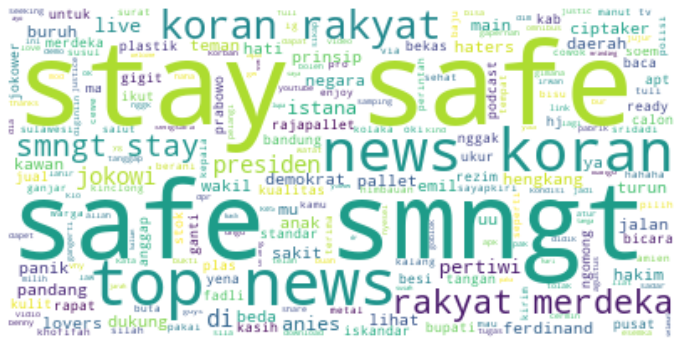

Negative comments in training set


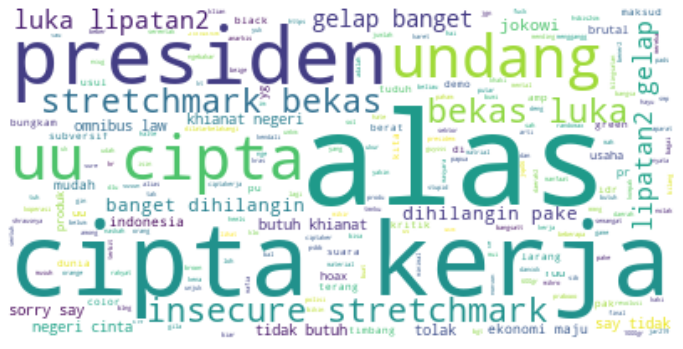

In [ ]:
def create_wordcloud_with_mask (data):
    # read the mask image
    # usa_mask = np.array(Image.open(path.join("/kaggle/input/usamap/usa_map.jpg")))
    wcloud = WordCloud(max_words=1000,
                       stopwords=set(STOPWORDS),
                       background_color='white',
                       contour_width=3,
                       contour_color='steelblue')
    #create word cloud
    wcloud.generate(data)
    #display
    plt.figure(1,figsize=(12, 12))
    plt.imshow(wcloud, cmap=plt.cm.gray, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
print("Positive comments in training set")
create_wordcloud_with_mask(train_pos_texts_str)
print("Negative comments in training set")
create_wordcloud_with_mask(train_neg_texts_str)


#DATA MODELLING

##Build BOW (Bag-of-Words) Model


In [ ]:
def build_bow_features(words):
    return {word:True for word in words}

In [ ]:
#build a list of tuples (BOW_dict, label) for all tweets
train_bow = [(build_bow_features(tuple[0]), tuple[1]) for tuple in train]
test_bow = [(build_bow_features(tuple[0]), tuple[1]) for tuple in test]


In [ ]:
print(len(train_bow),len(test_bow))

77 9


##Train classifier

In [ ]:
sentiment_classifier = NaiveBayesClassifier.train(train_bow)

In [ ]:
import nltk
from nltk.classify import NaiveBayesClassifier

In [ ]:
nltk.classify.util.accuracy(sentiment_classifier, train_bow)*100

100.0

In [ ]:
nltk.classify.util.accuracy(sentiment_classifier, test_bow)*100

100.0

#PREDICTION

In [ ]:
import numpy as np


test_comment_dicts, test_labels = list(zip(*test_bow))
preds = [sentiment_classifier.classify(comment_dict) for comment_dict in test_comment_dicts]
pred_vs_observ = pd.DataFrame(np.array([test_labels,preds]).T,columns=['observation','prediction'])
pred_vs_observ.transpose()

,0,1,2,3,4,5,6,7,8
observation,positive,negative,negative,negative,positive,negative,positive,positive,negative
prediction,positive,negative,negative,negative,positive,negative,positive,positive,negative


###Confusion Matrix
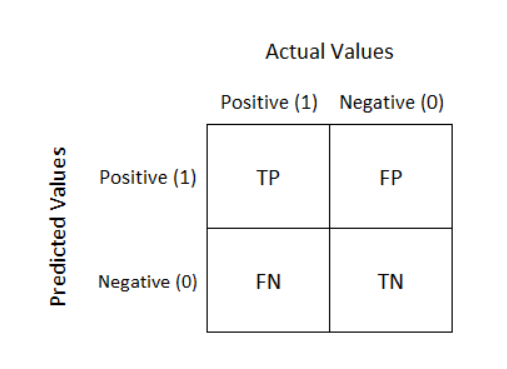

In [ ]:
print(confusion_matrix(test_labels, preds))

[[5 0]
 [0 4]]


In [ ]:
sentiment_classifier.show_most_informative_features(100)


Most Informative Features
                      uu = True           negati : positi =      6.8 : 1.0
                   bekas = True           negati : positi =      5.0 : 1.0
                 omnibus = True           negati : positi =      3.2 : 1.0
                     law = True           negati : positi =      3.2 : 1.0
                   tolak = True           negati : positi =      2.6 : 1.0
                presiden = True           negati : positi =      2.1 : 1.0
                      yg = True           negati : positi =      2.1 : 1.0
                  daerah = True           positi : negati =      1.9 : 1.0
                    alas = None           positi : negati =      1.8 : 1.0
                   kerja = None           positi : negati =      1.6 : 1.0
                      di = True           positi : negati =      1.6 : 1.0
                   cipta = None           positi : negati =      1.6 : 1.0
                    safe = None           negati : positi =      1.6 : 1.0